# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["Reviews"] = reviews
df.head()

,Reviews
0,✅ Trip Verified | I flew from Cairo to Heathr...
1,"Not Verified | I flew with numerous airlines, ..."
2,✅ Trip Verified | We were traveling as a fami...
3,✅ Trip Verified | Flight at 8.40am from DUB to...
4,✅ Trip Verified | Terrible. I have traveled t...


In [4]:
df.Reviews= df.Reviews.str.split('|',expand=True)[1]

In [5]:
df.head()

,Reviews
0,I flew from Cairo to Heathrow on what they c...
1,"I flew with numerous airlines, but I gotta ad..."
2,We were traveling as a family (5 people). Be...
3,Flight at 8.40am from DUB to LCY cancelled 11...
4,Terrible. I have traveled twice with them th...


In [6]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df

,Reviews
0,I flew from Cairo to Heathrow on what they c...
1,"I flew with numerous airlines, but I gotta ad..."
2,We were traveling as a family (5 people). Be...
3,Flight at 8.40am from DUB to LCY cancelled 11...
4,Terrible. I have traveled twice with them th...
...,...
995,Gatwick to Paphos in Club Europe. We travell...
996,\r\nNew York to Nairobi via London. Flight A...
997,Istanbul to London Heathrow. The plane itsel...
998,Bad service and attitude all round. My fiasc...


In [8]:
df.shape

(1000, 1)

In [9]:
df.size

1000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [11]:
df.isna().sum()

Reviews    0
dtype: int64

## Data Cleaning:

In [12]:
df

,Reviews
0,I flew from Cairo to Heathrow on what they c...
1,"I flew with numerous airlines, but I gotta ad..."
2,We were traveling as a family (5 people). Be...
3,Flight at 8.40am from DUB to LCY cancelled 11...
4,Terrible. I have traveled twice with them th...
...,...
995,Gatwick to Paphos in Club Europe. We travell...
996,\r\nNew York to Nairobi via London. Flight A...
997,Istanbul to London Heathrow. The plane itsel...
998,Bad service and attitude all round. My fiasc...


In [13]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['Reviews'].apply(clean)
df.head()

,Reviews,Cleaned Reviews
0,I flew from Cairo to Heathrow on what they c...,I flew from Cairo to Heathrow on what they ca...
1,"I flew with numerous airlines, but I gotta ad...",I flew with numerous airlines but I gotta adm...
2,We were traveling as a family (5 people). Be...,We were traveling as a family people Because ...
3,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...
4,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...


## Text Pre-Processing 

In [14]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


import nltk


"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

#The nltk.corpus module in the NLTK (Natural Language Toolkit) library provides a collection of linguistic resources, including corpora (plural of corpus) that are widely used for natural language processing tasks. 


In [15]:
import nltk
#nltk.download()

In [16]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

### Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

### Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

### Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

In [19]:
# POS tagger dictionary


pos_dict = {'JJ':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'RB':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
            #print(tag[0])
            #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,Reviews,Cleaned Reviews,POS tagged
0,I flew from Cairo to Heathrow on what they c...,I flew from Cairo to Heathrow on what they ca...,"[(flew, v), (Cairo, n), (Heathrow, v), (call, ..."
1,"I flew with numerous airlines, but I gotta ad...",I flew with numerous airlines but I gotta adm...,"[(flew, v), (numerous, None), (airlines, n), (..."
2,We were traveling as a family (5 people). Be...,We were traveling as a family people Because ...,"[(traveling, v), (family, n), (people, n), (ac..."
3,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...,"[(Flight, n), (DUB, n), (LCY, n), (cancelled, ..."
4,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...,"[(Terrible, None), (traveled, v), (twice, None..."


In [20]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Reviews,Cleaned Reviews,POS tagged,Lemma
0,I flew from Cairo to Heathrow on what they c...,I flew from Cairo to Heathrow on what they ca...,"[(flew, v), (Cairo, n), (Heathrow, v), (call, ...",fly Cairo Heathrow call euro club class cram...
1,"I flew with numerous airlines, but I gotta ad...",I flew with numerous airlines but I gotta adm...,"[(flew, v), (numerous, None), (airlines, n), (...",fly numerous airline get ta admit British Ai...
2,We were traveling as a family (5 people). Be...,We were traveling as a family people Because ...,"[(traveling, v), (family, n), (people, n), (ac...",travel family people accident airport arrive...
3,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...,"[(Flight, n), (DUB, n), (LCY, n), (cancelled, ...",Flight DUB LCY cancel pm night text message ...
4,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...,"[(Terrible, None), (traveled, v), (twice, None...",Terrible travel twice year via business clas...


## Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [26]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

df

,Reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment
0,I flew from Cairo to Heathrow on what they c...,I flew from Cairo to Heathrow on what they ca...,"[(flew, v), (Cairo, n), (Heathrow, v), (call, ...",fly Cairo Heathrow call euro club class cram...,-0.7717
1,"I flew with numerous airlines, but I gotta ad...",I flew with numerous airlines but I gotta adm...,"[(flew, v), (numerous, None), (airlines, n), (...",fly numerous airline get ta admit British Ai...,0.2960
2,We were traveling as a family (5 people). Be...,We were traveling as a family people Because ...,"[(traveling, v), (family, n), (people, n), (ac...",travel family people accident airport arrive...,0.5267
3,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...,"[(Flight, n), (DUB, n), (LCY, n), (cancelled, ...",Flight DUB LCY cancel pm night text message ...,-0.8468
4,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...,"[(Terrible, None), (traveled, v), (twice, None...",Terrible travel twice year via business clas...,-0.8860
...,...,...,...,...,...
995,Gatwick to Paphos in Club Europe. We travell...,Gatwick to Paphos in Club Europe We travelled...,"[(Gatwick, n), (Paphos, n), (Club, n), (Europe...",Gatwick Paphos Club Europe travel first Satu...,0.9545
996,\r\nNew York to Nairobi via London. Flight A...,New York to Nairobi via London Flight Attenda...,"[(New, n), (York, n), (Nairobi, n), (via, None...",New York Nairobi via London Flight Attendant...,0.9633
997,Istanbul to London Heathrow. The plane itsel...,Istanbul to London Heathrow The plane itself ...,"[(Istanbul, n), (London, n), (Heathrow, n), (p...",Istanbul London Heathrow plane old find food...,0.9495
998,Bad service and attitude all round. My fiasc...,Bad service and attitude all round My fiasco ...,"[(Bad, n), (service, n), (attitude, v), (round...",Bad service attitude round fiasco flight Lon...,-0.8519


In [29]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I flew from Cairo to Heathrow on what they c...,I flew from Cairo to Heathrow on what they ca...,"[(flew, v), (Cairo, n), (Heathrow, v), (call, ...",fly Cairo Heathrow call euro club class cram...,-0.7717,Negative
1,"I flew with numerous airlines, but I gotta ad...",I flew with numerous airlines but I gotta adm...,"[(flew, v), (numerous, None), (airlines, n), (...",fly numerous airline get ta admit British Ai...,0.2960,Neutral
2,We were traveling as a family (5 people). Be...,We were traveling as a family people Because ...,"[(traveling, v), (family, n), (people, n), (ac...",travel family people accident airport arrive...,0.5267,Positive
3,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...,"[(Flight, n), (DUB, n), (LCY, n), (cancelled, ...",Flight DUB LCY cancel pm night text message ...,-0.8468,Negative
4,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...,"[(Terrible, None), (traveled, v), (twice, None...",Terrible travel twice year via business clas...,-0.8860,Negative


In [35]:
var = df['Analysis'].value_counts()
var

Positive    509
Negative    385
Neutral     106
Name: Analysis, dtype: int64

### Visualization:

In [31]:
import matplotlib.pyplot as plt

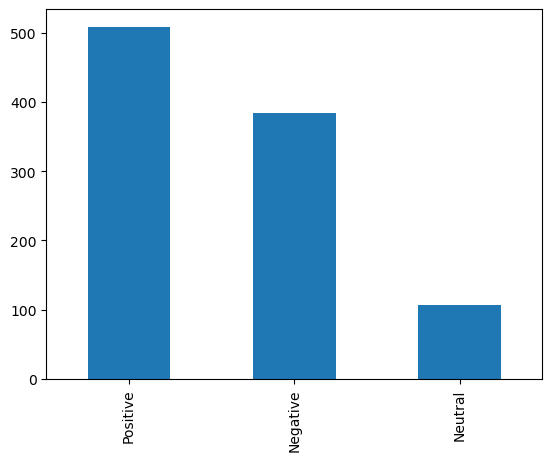

In [34]:
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

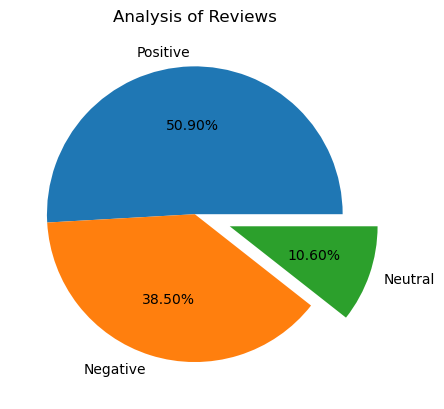

In [40]:
plt.pie(var.values, labels = var.index, explode = (0, 0, 0.25), autopct='%1.2f%%')
plt.title('Analysis of Reviews')
plt.show()


### Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [41]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 4.6 MB/s eta 0:00:00


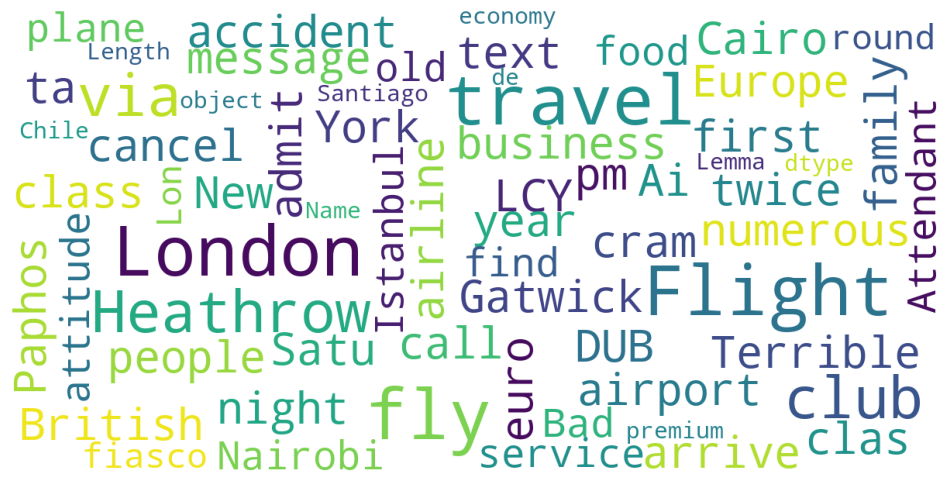

In [42]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)